# Titanic Dataset

In [953]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [954]:
#reading training data
df = pd.read_csv("C:/Projects/Titanic/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [955]:
#reading test data
df_test = pd.read_csv("C:/Projects/Titanic/titanic/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [956]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [957]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [958]:
df.isnull().sum() #counts all the missing values in each of the features

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [959]:
dataset = [df, df_test]

# Data Preprocessing

## Using Regression to impute data

In [960]:
# missing_columns = ["Age"]

In [961]:
# this function replaces the missing values with some random observed values of the variable
# def random_imputation(df, feature):

#     number_missing = df[feature].isnull().sum()
#     observed_values = df.loc[df[feature].notnull(), feature]
#     df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
#     return df

In [962]:
# for feature in missing_columns:
#     df[feature + '_imp'] = df[feature]
#     df = random_imputation(df, feature)

## Imputing Data using Median and Mode

In [963]:
def impute_data(dataset):
    for data in dataset:
        # complete missing age with median
        data['Age'].fillna(data['Age'].median(), inplace = True)

        #complete missing Embarked with Mode
        data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

        #complete missing Fare with median
        data['Fare'].fillna(data['Fare'].median(), inplace = True)

In [964]:
impute_data(dataset)

In [965]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [966]:
for dataset in dataset:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 26), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 35), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 6
df['Age'].value_counts()

3    222
2    139
4    133
5    116
6    101
1     97
0     83
Name: Age, dtype: int64

## EDA

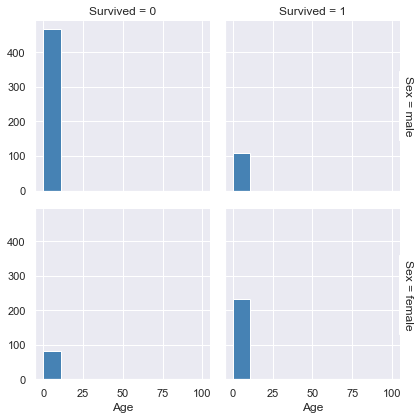

In [967]:
sns.set(style="darkgrid")

g = sns.FacetGrid(df, row="Sex", col="Survived", margin_titles=True)
bins = np.linspace(0, 100, 10)
g.map(plt.hist, "Age", color="steelblue", bins=bins)

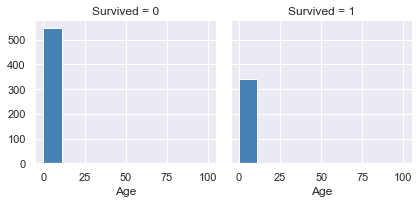

In [968]:
g = sns.FacetGrid(df, col="Survived", margin_titles=True)
bins = np.linspace(0, 100, 10)
g.map(plt.hist, "Age", color="steelblue", bins=bins)

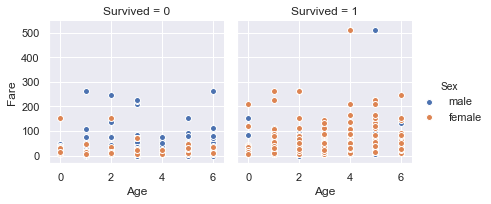

In [969]:
g = sns.FacetGrid(df, col="Survived",  hue="Sex")
g = (g.map(plt.scatter, "Age", "Fare", edgecolor="w")
      .add_legend())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


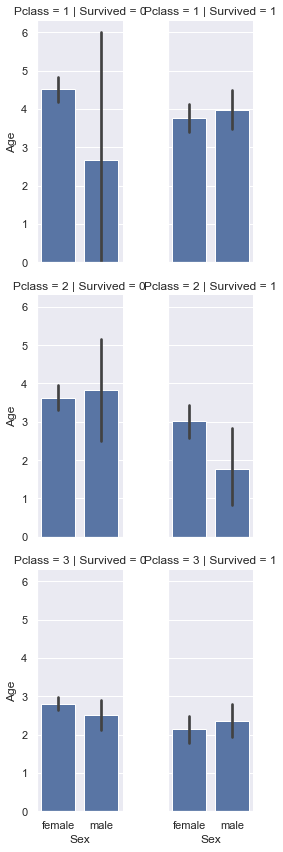

In [970]:
g = sns.FacetGrid(df, col="Survived", row = "Pclass", height=4, aspect=.5)
g.map(sns.barplot, "Sex", "Age");

In [971]:
# g = sns.FacetGrid(df, col="Survived", col_wrap=4, height=2, ylim=(0, 10))
# g.map(sns.pointplot, "", "Age_imp", order=[1, 2, 3], color=".3", ci=None);

## Logistic Regression

### One Hot Coding

In [972]:
df = pd.get_dummies(df, columns=["Sex", "Pclass", "Embarked"]).head()
df_test = pd.get_dummies(df_test, columns=["Sex", "Pclass", "Embarked"])

In [973]:
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",2,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",5,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",2,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",4,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


In [974]:
#defining the train and test datasets
predictions = ['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female' ,'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
x_train = df[predictions]
y_train = df["Survived"]
x_test = df_test[predictions]

In [975]:
def logistic_regression(x_train, y_train, x_test):   
    logisticRegr = LogisticRegression()
    logisticRegr.fit(x_train, y_train)
    pred1=logisticRegr.predict(x_test)
    pred = list(pred1)
    df_res = pd.DataFrame()
    df_res['PassengerId'] = df_test['PassengerId']
    df_res['Survived'] = pred
    return df_res
    

In [976]:
x = logistic_regression(x_train, y_train, x_test)
print(x)

     PassengerId  Survived
0            892         0
1            893         1
2            894         1
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [977]:
#writing the results to a csv file
df_res.to_csv(r'C:/Projects/Titanic/titanic/results_logistic_regression.csv', index = False)

## Meauring the Accuracy of the Model

In [978]:
#measuring the accuracy of the model
df_test_y = pd.read_csv("C:/Projects/Titanic/titanic/gender_submission.csv")
y_test = df_test_y['Survived']
print('Accuracy Score :')
print(metrics.accuracy_score(y_test, pred))

Accuracy Score :
0.8038277511961722


In [979]:
from sklearn.metrics import accuracy_score
Log_acc = round(accuracy_score(pred1,y_test)*100,2)
print(Log_acc)

80.38


# Support Vector Machines

## Data Standardization

In [980]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)

x_train

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,2,0,0,1,0,1,0,0,1
1,5,1,0,0,1,0,1,0,0
2,2,0,0,1,1,0,0,0,1
3,4,1,0,0,1,0,0,0,1
4,4,0,0,1,0,1,0,0,1


In [981]:
# scaler.fit(x_test)
# x_test = scaler.transform(x_test)
x_test

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,4,0,0,1,0,1,0,1,0
1,6,0,0,1,1,0,0,0,1
2,6,0,1,0,0,1,0,1,0
3,3,0,0,1,0,1,0,0,1
4,2,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,0,0,1
414,5,1,0,0,1,0,1,0,0
415,5,0,0,1,0,1,0,0,1
416,3,0,0,1,0,1,0,0,1


In [982]:
# x_train["Age"] = x_train["Age"]/100
# x_test["Age"] = x_test["Age"]

In [983]:
from sklearn.svm import SVC, LinearSVC
svc = LinearSVC()
svc.fit(x_train, y_train)
svm_pred = svc.predict(x_test)
svm_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [984]:
acc_linear_svc = round(svc.score(x_train, y_train) * 100, 2)
print('The accuracy of the Support Vector Machines Classifier is',acc_linear_svc)

The accuracy of the Support Vector Machines Classifier is 100.0


In [985]:
#writing the predicted values into a csv file
df_res = pd.DataFrame()
df_res['PassengerId'] = df_test['PassengerId']
df_res['Survived'] = svm_pred
df_res
df_res.to_csv(r'C:/Projects/Titanic/titanic/results_svm.csv', index = False)

In [986]:
#measuring the accuracy of the model
print('Accuracy Score :')
print(metrics.accuracy_score(y_test, svm_pred))

Accuracy Score :
1.0


In [987]:
cnf_matrix = metrics.confusion_matrix(y_test, svm_pred)
cnf_matrix

array([[266,   0],
       [  0, 152]], dtype=int64)

In [988]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))
print("Precision:",metrics.precision_score(y_test, svm_pred))
print("Recall:",metrics.recall_score(y_test, svm_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
